In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

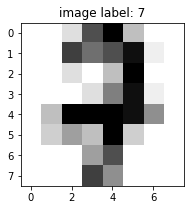

In [2]:
digits = load_digits()
#Sample image show
random_index = 108
plt.figure(figsize=(3,3))

plt.imshow(digits.images[random_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("image label: %d" % digits.target[random_index]);

In [3]:
from sklearn.model_selection import train_test_split

data_image = np.asarray(digits.data,dtype='float32')
target_label = np.asarray(digits.target,dtype='float32')
x_train,x_test,y_train,y_test = train_test_split(data_image,target_label,test_size=0.15,random_state=36)

In [4]:
#displaying the sizes of train and test data

print("Input training data :", x_train.shape)
print("Input test data :", x_test.shape)
print("Output training data :", y_train.shape)
print("Output test data :", y_test.shape)

Input training data : (1527, 64)
Input test data : (270, 64)
Output training data : (1527,)
Output test data : (270,)


In [5]:
print(x_train,"\n",x_test)
print(x_train[0],"\n",x_test[0])

[[ 0.  0. 15. ...  1.  0.  0.]
 [ 0.  0.  6. ...  1.  0.  0.]
 [ 0.  0.  0. ...  9.  0.  0.]
 ...
 [ 0.  0. 11. ... 16. 16.  5.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  0. ... 16.  8.  0.]] 
 [[ 0.  0.  0. ... 12.  4.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  7. ...  3.  0.  0.]
 ...
 [ 0.  0.  1. ... 16.  8.  0.]
 [ 0.  0.  5. ... 16.  3.  0.]
 [ 0.  0.  3. ...  6.  0.  0.]]
[ 0.  0. 15. 16. 11.  3.  0.  0.  0.  0.  4. 10. 15. 15.  3.  0.  0.  0.
  0.  0. 14. 16.  5.  0.  0.  0.  0.  5. 16. 12.  0.  0.  0.  0.  0.  3.
 16. 11.  1.  0.  0.  0.  0.  2. 13. 16.  9.  0.  0.  0.  6. 15. 16. 12.
  3.  0.  0.  0. 15. 14.  7.  1.  0.  0.] 
 [ 0.  0.  0. 12. 15.  1.  0.  0.  0.  0.  4. 16. 13.  1.  0.  0.  0.  1.
 14. 15.  2.  0.  0.  0.  0.  4. 16. 15. 10.  7.  0.  0.  0.  7. 16. 16.
 12. 16.  6.  0.  0.  3. 16. 13.  0. 16. 12.  0.  0.  0. 11. 16. 13. 16.
 12.  0.  0.  0.  1.  9. 13. 12.  4.  0.]


In [6]:
#data preprocessing

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

X_train.mean(axis=0)
X_train.std(axis=0)

array([0.        , 0.99999577, 1.0000014 , 0.9999987 , 0.9999978 ,
       0.9999981 , 0.9999933 , 0.9999895 , 0.99999654, 1.000003  ,
       0.99999964, 0.99999917, 1.0000023 , 1.000002  , 0.9999937 ,
       0.99999166, 0.9999893 , 0.9999955 , 0.999999  , 0.9999985 ,
       1.0000029 , 1.000002  , 0.99999416, 1.000001  , 0.9999962 ,
       0.99999624, 0.99999636, 1.0000018 , 0.9999989 , 0.9999994 ,
       1.0000037 , 0.99999404, 0.        , 0.9999948 , 0.9999989 ,
       0.99999946, 0.9999993 , 1.0000005 , 0.9999958 , 0.        ,
       0.999994  , 0.9999977 , 1.0000013 , 0.9999995 , 0.99999917,
       1.0000027 , 1.0000035 , 1.0000051 , 0.9999947 , 1.0000073 ,
       0.99999905, 1.000001  , 1.000001  , 1.0000007 , 1.0000027 ,
       1.0000011 , 0.9999865 , 0.9999913 , 0.9999975 , 1.0000013 ,
       1.0000029 , 0.9999988 , 1.000004  , 1.0000015 ], dtype=float32)

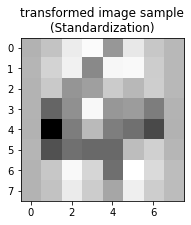

In [7]:
#display transformed image
random_index = 108
plt.figure(figsize=(3,3))
plt.imshow(X_train[random_index].reshape(8,8),cmap=plt.cm.gray_r,interpolation="nearest")
plt.title("transformed image sample\n(Standardization)");

In [8]:
#Converting target into one-hot encoding values

from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)

In [9]:
Y_train.shape

(1527, 10)

In [10]:
#Building feed forward Network 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import tensorflow as tf
# import tensorflow.keras.backend
tf.compat.v1.enable_eager_execution()


input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]
hidden_dim=1000


model = Sequential()
model.add(Dense(hidden_dim,input_dim=input_dim,activation="tanh"))
model.add(Dense(hidden_dim,activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

# from tensorflow.keras import initializers

# normal_init = initializers.TruncatedNormal(stddev=0)

# model = Sequential()
# model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh", kernel_initializer=normal_init))
# model.add(Dense(hidden_dim, activation="tanh", kernel_initializer=normal_init))
# model.add(Dense(output_dim, activation="softmax", kernel_initializer=normal_init))
# model.compile(optimizer=optimizers.Adam(learning_rate=0.1),  loss='categorical_crossentropy', metrics=['accuracy'])
# model.layers
# model.layers[0].weights
# w = model.layers[0].weights[0].numpy()
# b = model.layers[0].weights[1].numpy()
# history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

# plt.figure(figsize=(12, 4))
# plt.plot(history.history['loss'], label="Truncated Normal init")
# plt.legend();

model.compile(optimizer=optimizers.SGD(learning_rate = 0.01), loss="categorical_crossentropy", metrics = ['accuracy'])

history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=25, batch_size=32)



Train on 1221 samples, validate on 306 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
1221/1221 [==============================] - 0s 364us/sample - loss: 1.3351 - acc: 0.7158 - val_loss: 0.7528 - val_acc: 0.8856
Epoch 2/25
1221/1221 [==============================] - 0s 209us/sample - loss: 0.5707 - acc: 0.9124 - val_loss: 0.4784 - val_acc: 0.9248
Epoch 3/25
1221/1221 [==============================] - 0s 217us/sample - loss: 0.3948 - acc: 0.9353 - val_loss: 0.3734 - val_acc: 0.9379
Epoch 4/25
1221/1221 [==============================] - 0s 224us/sample - loss: 0.3122 - acc: 0.9402 - val_loss: 0.3136 - val_acc: 0.9444
Epoch 5/25
1221/1221 [==============================] - 0s 237us/sample - loss: 0.2641 - acc: 0.9509 - val_loss: 0.2751 - val_acc: 0.9477
Epoch 6/25
1221/1221 [==============================] - 0s 210us/sample - loss: 0.2322 - acc: 0.9574 - val_loss: 0.2493 - val_acc: 0.9542
Epoch 7/25
1221/1221 [=========

Task : 2D - Using Adam with Relu


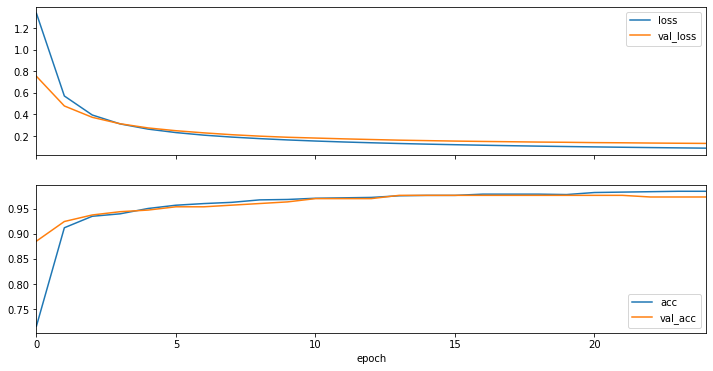

In [11]:
#Visualizing the Convergence
import pandas as pd

print("Task : 2D - Using Adam with Relu")
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
fig,(ax0,ax1) = plt.subplots(nrows=2,sharex=True, figsize=(12,6))
history_df.plot(x="epoch",y=["loss","val_loss"],ax=ax0)
history_df.plot(x="epoch",y=["acc","val_acc"],ax=ax1)

In [12]:
 y_predicted = np.argmax(model.predict(x_test, verbose=0), axis=1)

test acc: 0.8259


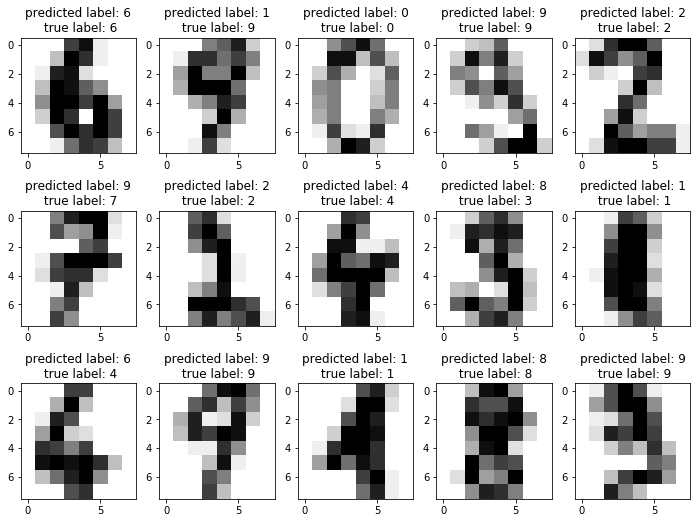

In [13]:
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(12, 9))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(scaler.inverse_transform(X_test[i:i+1]).reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("predicted label: %d\n true label: %d" % (y_predicted[i], y_test[i]))
print("test acc: %0.4f" % np.mean(y_predicted == y_test))


#Task 3A and 3B - test and accuracy